In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

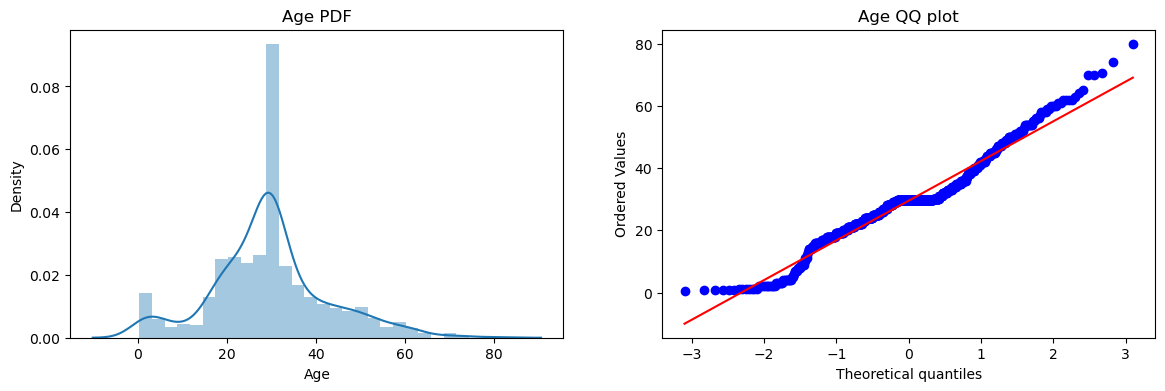

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

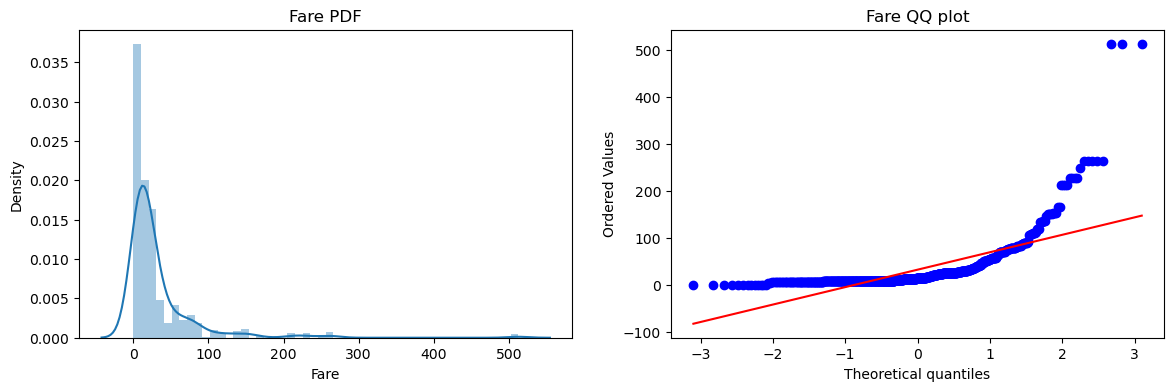

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')
plt.show()

In [10]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [11]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred1=clf2.predict(x_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


In [12]:
trf=FunctionTransformer(func=np.log1p)

In [13]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


In [15]:
x_transformed=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6644569288389512


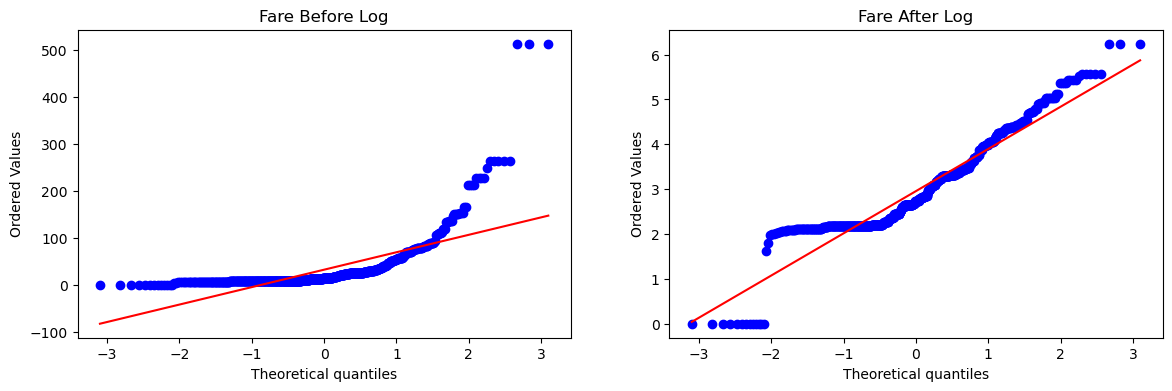

In [16]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare After Log')

plt.show()

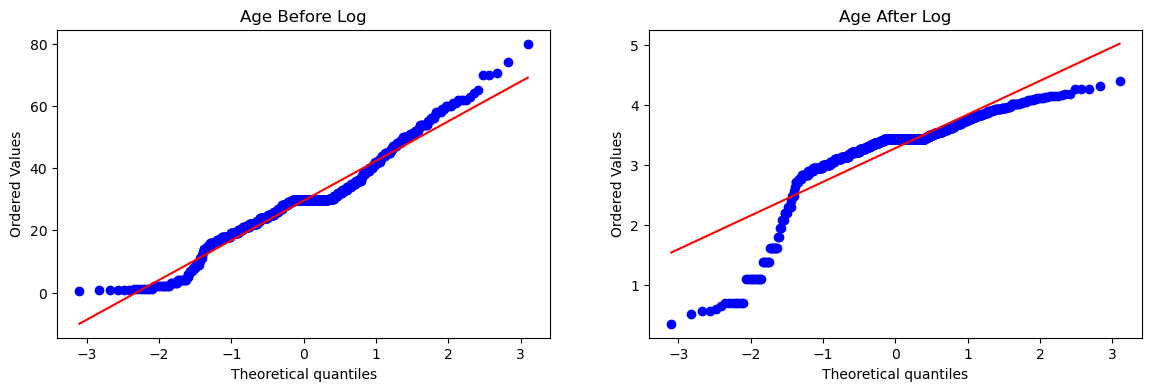

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age After Log')

plt.show()

In [18]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2=trf2.fit_transform(x_train)
x_test_transformed2=trf2.transform(x_test)

In [19]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred=clf.predict(x_test_transformed2)
y_pred2=clf2.predict(x_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6815642458100558


In [20]:
x_transformed2=trf2.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577028714107366


In [21]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(x)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6611485642946316


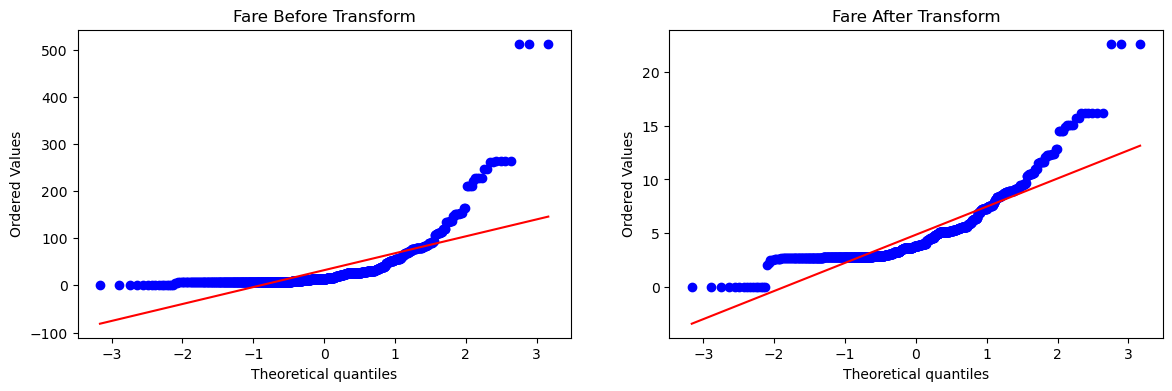

In [22]:
apply_transform(lambda x:x**0.5)